# 1. 회귀(Regression)
- Dataset : NYC_taxi.csv
- 거리에 따른 택시요금 예측
- 조건) 뉴욕시 내에서 승차/하차의 경우만

In [32]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### [1] 데이터 로딩

In [1]:
# nrows : 로딩 데이터 수
# parse_dates : 데이터 불러올때 datetime 형태로 불러올 수 있음
import pandas as pd
df=pd.read_csv('train.csv', nrows=50000, parse_dates=['pickup_datetime'])

In [2]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                50000 non-null  object             
 1   fare_amount        50000 non-null  float64            
 2   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   50000 non-null  float64            
 4   pickup_latitude    50000 non-null  float64            
 5   dropoff_longitude  50000 non-null  float64            
 6   dropoff_latitude   50000 non-null  float64            
 7   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [4]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


### [2] 결측치 및 이상치 체크

In [5]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
# 요금이 0보다 크고 승객의 수가 0인 행만 데이터프레임에 저장
df=df[(df['fare_amount']>0) & (df['passenger_count']!=0)]

#### 특성 새롭게 생성 => 거리 Feature
---
- 공식 : sqrt((x2-x1)^2+(y2-y1)^2)

In [8]:
import numpy as np
df['distance']=np.sqrt((df['dropoff_latitude']-df['pickup_latitude'])**2+(df['dropoff_longitude']-df['pickup_longitude'])**2)

In [9]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470


In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000
mean,11.373050,-72.510586,39.934185,-72.506925,39.927466,1.673424,0.183317
std,9.693572,10.391352,6.225261,10.400046,6.011749,1.287790,3.770397
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,0.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000,0.012472
50%,8.500000,-73.981838,40.752685,-73.980086,40.753376,1.000000,0.021502
75%,12.500000,-73.967145,40.767364,-73.963619,40.768163,2.000000,0.038681
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,360.304405


In [11]:
df.shape

(49826, 9)

In [12]:
# 뉴욕시에 해당하는 위도, 경도만 포함하는 데이터프레임 다시 저장
df=df[(df['pickup_longitude']>=-74.27) & (df['pickup_longitude']<=-73.68)
  & (df['dropoff_longitude']>=-74.27) & (df['dropoff_longitude']<=-73.68)
  & (df['pickup_latitude']>=40.49) & (df['pickup_latitude']<=40.92)
  & (df['dropoff_latitude']>=40.49) & (df['dropoff_latitude']<=40.92)]

In [13]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,0.045782
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.008049
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,0.020574
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,0.007686


In [21]:
data=df['distance']
target=df['fare_amount']

data.head()

0    0.009436
1    0.079696
2    0.013674
3    0.025340
4    0.019470
Name: distance, dtype: float64

In [22]:
target.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### [4] 학습, 테스트 데이터 분리

In [23]:
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST=train_test_split(
data, target, test_size=0.2, random_state=42)

In [24]:
X_TRAIN=np.array(X_TRAIN)
X_TEST=np.array(X_TEST)
Y_TRAIN=np.array(Y_TRAIN)
Y_TEST=np.array(Y_TEST)

In [25]:
X_TRAIN=X_TRAIN.reshape(-1, 1)
Y_TRAIN=Y_TRAIN.reshape(-1, 1)
X_TEST=X_TEST.reshape(-1, 1)
Y_TEST=Y_TEST.reshape(-1, 1)

### [3] 모델 만들기

In [26]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()

In [27]:
ln.fit(X_TRAIN, Y_TRAIN)

LinearRegression()

In [28]:
ln.score(X_TEST, Y_TEST)

0.746328651608519

In [29]:
print(ln.coef_, ln.intercept_)

[[216.04080115]] [3.98205219]


### [4] 예측하기

In [166]:
ln.predict([[0.056]])

array([[16.08033705]])

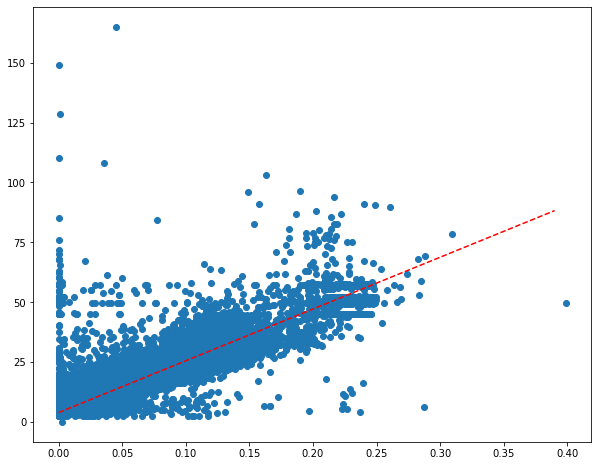

In [37]:
point=np.arange(0, 0.4, 0.01)

plt.figure(figsize=(10, 8))
plt.scatter(df['distance'], df['fare_amount'])
plt.plot(point, ln.coef_[0][0]*point+ln.intercept_[0], color='red', linestyle='--')
plt.show()

# 2. 분류(Classification)
- Dataset : diabetes.csv
- 당뇨 발생 여부
- 조건) 당뇨병 발병 확률이 XX%입니다.

### 데이터 불러오기

In [167]:
import pandas as pd

df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 데이터 확인하기

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [169]:
df.shape

(768, 9)

In [170]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [171]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [173]:
data=df.iloc[:, :-1]
target=df.iloc[:, -1]

target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### 모델 만들기

In [174]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=150)

### 데이터 분리

In [175]:
from sklearn.model_selection import train_test_split

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST=train_test_split(
data, target, test_size=0.2, random_state=42)

In [176]:
model.fit(X_TRAIN, Y_TRAIN)

LogisticRegression(max_iter=150)

In [177]:
model.score(X_TEST, Y_TEST)

0.7467532467532467

### 예측하기

In [178]:
model.predict_proba([[3, 90, 89, 25, 150, 37.7, 0.5, 56]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.71286776, 0.28713224]])

## 0을 제거한 데이터프레임

In [51]:
df2=df[(df['Glucose']!=0) & (df['BloodPressure']!=0) & (df['SkinThickness']!=0) &
  (df['Insulin']!=0) & (df['BMI']!=0) & (df['Age']!=0)]

In [42]:
data2=df2.iloc[:, :-1]
target2=df2.iloc[:, -1]

In [ ]:
model2=LogisticRegression(max_iter=200)

In [ ]:
X_TRAIN2, X_TEST2, Y_TRAIN2, Y_TEST2=train_test_split(
data2, target2, test_size=0.2, random_state=42)

In [49]:
model2.fit(X_TRAIN2, Y_TRAIN2)

LogisticRegression(max_iter=200)

In [50]:
model2.score(X_TEST2, Y_TEST2)

0.7721518987341772

In [53]:
model2.predict_proba([[3, 90, 89, 25, 150, 37.7, 0.5, 56]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.82330081, 0.17669919]])